In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read data 

In [2]:
prices=pd.read_csv("data/raw/2020/01/2020-01-01-prices.csv")
stations=pd.read_csv("data/stations.csv")

In [3]:
prices.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2020-01-01 00:00:04+01,81d72fa3-5270-45af-816f-ba0abb7776f4,1.319,1.469,1.449,1,0,0
1,2020-01-01 00:01:04+01,ec70685a-1110-4632-8735-8d2cebd07da6,1.269,1.389,1.369,1,1,1
2,2020-01-01 00:01:04+01,4de95bf1-c91c-4bf9-a0f3-9c1069dfc277,1.289,1.419,1.399,1,1,1
3,2020-01-01 00:01:04+01,9bb515a4-c551-41b8-a8a1-e120f29474fd,1.229,1.359,0.000,1,1,0
4,2020-01-01 00:01:04+01,3e385667-56a9-46b4-96de-2adcfd7b5655,1.319,1.439,1.419,1,1,1


In [4]:
len(prices)

207898

In [5]:
stations.head()

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude
0,00060723-0001-4444-8888-acdc00000001,BAGeno Raiffeisen eG,NaN,Künzelsauer Strasse,7,74653,Ingelfingen,49.296822,9.661385
1,005056ba-7cb6-1ed2-bceb-5332ab168d12,famila Tankstelle,FAMILA,Pascalstrasse,9,25442,Quickborn,53.742150,9.941240
2,005056ba-7cb6-1ed2-bceb-573c18314d16,star Tankstelle,STAR,Riehler Strasse,240,50735,Köln,50.961800,6.980070
3,005056ba-7cb6-1ed2-bceb-662ba1a94d1f,star Tankstelle,STAR,BAB 10 / Seeberg Ost,NaN,15345,Altlandsberg,52.550160,13.682120
4,005056ba-7cb6-1ed2-bceb-6f7b23564d23,star Tankstelle,STAR,Duisburger Straße,130,47166,Duisburg,51.489790,6.783730


In [6]:
len(stations.loc[(stations.city=="Hamburg")|(stations.city=="HAMBURG")])

222

set range for lattitude

In [7]:
minlat=53.567181
maxlat=53.648408

In [8]:
minlon=9.876232
maxlon=9.941601

In [9]:
#(stations.city=="Hamburg")& - 26 
# wo 51 
stations_on_route=stations.loc[
             (stations.latitude>minlat)&(stations.latitude<maxlat)&
            (stations.longitude>minlon)&(stations.longitude<maxlon)]
   

In [89]:
stations_on_route.loc[(stations_on_route.latitude<53.613)&(stations_on_route.longitude<9.95)] 
#&(stations_on_route.longitude>9.9528) (stations_on_route.latitude>53.611)&

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude
621,005056ba-7cb6-1ed2-bceb-6e6ee17d4d20,star Tankstelle,STAR,Kieler Straße,206,22525,Hamburg,53.577040,9.937720
771,005056ba-7cb6-1ed2-bceb-971fa39ded38,star Tankstelle,STAR,Luruper Chaussee,18-22,22761,Hamburg,53.572900,9.894650
775,005056ba-7cb6-1ed2-bceb-980dcb9e8d3b,star Tankstelle,STAR,Farnhornweg,46a,22547,Hamburg,53.593220,9.890530
4600,51d4b4dc-a095-1aa0-e100-80009459e03a,JET HAMBURG KIELER STRASSE 234,JET,KIELER STRASSE 234,NaN,22525,HAMBURG,53.579040,9.936400
6387,6d7517d5-2a6c-403f-bd19-f9557c5ff16c,Aral Tankstelle,ARAL,Kieler Straße,560,22525,Hamburg,53.599940,9.917373
6917,7a5ee48a-680a-49e3-8705-fa4020f94e74,Aral Tankstelle,ARAL,Kieler Straße,285,22525,Hamburg,53.583813,9.933157
8003,92dbbe2c-26b9-4501-b424-ad1a6cece3bf,Aral Tankstelle,ARAL,Kieler Straße,314,22525,Hamburg,53.585860,9.933305
9542,b508e000-3721-491d-e269-a47b661033d4,CleanCar AG,CleanCar AG,Kieler Str.,195,22525,Hamburg,53.577190,9.937300
10971,d3c11609-f267-4eed-9b3a-7f5c75bbe909,Esso Tankstelle,ESSO,KOPPELSTR. 30,,22527,HAMBURG,53.593255,9.938910
11324,db974126-82aa-49ec-a038-1af3f0ba696f,"HAMBURG, OSDORFER LANDSTR.",Shell,OSDORFER LANDSTR. 1,NaN,22607,HAMBURG,53.569741,9.877121


In [ ]:
prices.loc[prices.station_uuid.isin(['d0235369-10e6-4862-8b27-66c03ddace6b','bae4c2cf-1dde-4edc-b394-4da173ee9a72'])]

In [ ]:
prices.loc[prices.station_uuid=='bae4c2cf-1dde-4edc-b394-4da173ee9a72']

In [10]:
len(stations_on_route)

21

In [11]:
#len 723
selected_prices = prices.loc[prices.station_uuid.isin(stations_on_route.uuid)]

In [12]:
len(selected_prices)

298

In [ ]:
selected_prices.head()

In [ ]:
#warning
#selected_prices['station_name']=selected_prices.station_uuid.copy()
#selected_prices['station_name']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['brand'].to_dict()).copy()
#selected_prices['station_name'] = selected_prices['station_uuid'].map(name_dict)

In [ ]:
#clean no warning version!
#selected_prices.loc[:,'station_name'] = selected_prices['station_uuid'].map(name_dict) 

extend station id to meaningful info

In [13]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['brand'].to_dict())
selected_prices.loc[:,'station_address']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['street'].to_dict())
selected_prices.loc[:,'station_latitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['latitude'].to_dict())
selected_prices.loc[:,'station_longitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['longitude'].to_dict())



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid

In [ ]:
#selected_prices.drop(['station_name','station_address','station_latitude','station_longitude'], axis=1,inplace=True)
#selected_prices.drop(['station_name'], axis=1,inplace=True)

In [14]:
selected_prices.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,station_name,station_address,station_latitude,station_longitude
1268,2020-01-01 04:37:04+01,51d4b4dc-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1,JET,KIELER STRASSE 234,53.57904,9.936400
3833,2020-01-01 05:02:04+01,95b23160-eeb2-440f-adc4-245238f24e42,1.419,1.559,1.539,1,1,1,ARAL,Holsteiner Chaussee,53.61471,9.906061
4195,2020-01-01 05:02:04+01,5336de21-fd2d-4821-b4fe-bf89684cdb81,1.389,1.529,1.509,1,1,1,ARAL,Pinneberger Straße,53.63288,9.910497
4864,2020-01-01 05:02:04+01,6d7517d5-2a6c-403f-bd19-f9557c5ff16c,1.419,1.559,1.539,1,1,1,ARAL,Kieler Straße,53.59994,9.917373
5499,2020-01-01 05:04:04+01,b282ef61-a88d-4abd-bfba-92524f78867e,1.419,1.559,1.539,1,1,1,ARAL,Schleswiger Damm,53.64182,9.916311


In [ ]:
def station_info():
    
    return tags['tagValue'].loc[tags['tagID']==tagID].values[0]

In [ ]:
selected_prices.to_csv("data/processed/2020/01/2020-01-01-prices.csv")

In [17]:
l_d = selected_prices.date[:5].values

In [ ]:
from datetime import datetime

datetime_object = datetime.strptime('2020-01-01 04:02:03+01', '%Y-%m-%d %H:%M:%S+01')
#selected_prices.date
#= pd.to_datetime(selected_prices.date, format='%Y-%m-%d %H:%M:%S+1')
print(datetime_object)

In [ ]:
datetime_object

In [ ]:
def dt_conv(l_d):
    for i in l_d:
        datetime_object = datetime.strptime(i, '%Y-%m-%d %H:%M:%S+01')
        print(datetime_object)

In [ ]:
dt_conv(l_d)

In [ ]:
datetime_object

In [ ]:
#selected_prices.loc[:,'dt']=
selected_prices.date.applymap(dt_conv)

In [18]:
df=selected_prices.loc[selected_prices.station_uuid=="95b23160-eeb2-440f-adc4-245238f24e42"]
#plot(figsize = (12,6))

In [66]:
len(df)

12

In [35]:
df['station_name'].values[0]

'ARAL'

In [41]:
len(selected_prices.station_uuid)

298

In [ ]:
for i in stations_on_route.uuid[2:4]:
    print(i)
    

005056ba-7cb6-1ed2-bceb-971fa39ded38
                          date                          station_uuid  diesel  \
11969   2020-01-01 06:29:03+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.409   
20668   2020-01-01 07:29:03+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.369   
21727   2020-01-01 07:43:03+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.339   
37342   2020-01-01 09:53:03+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.279   
50386   2020-01-01 10:25:04+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.319   
72625   2020-01-01 11:43:04+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.279   
75247   2020-01-01 11:53:04+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.269   
97619   2020-01-01 13:27:04+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.309   
104077  2020-01-01 13:59:04+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.309   
112056  2020-01-01 14:29:04+01  005056ba-7cb6-1ed2-bceb-971fa39ded38   1.289   

           e5    e10  dieselchange  e5change  e10change station_name  \
11969   1.

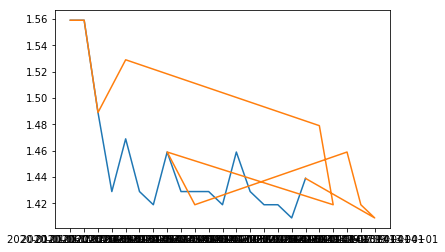

In [64]:

    
df = selected_prices.loc[selected_prices.station_uuid==i]
df1 = df.sort_values('date', ascending=True)
print(df1[:10])

plt.plot(df1['date'], df1['e5'],label=df1['station_name'].values[0]+df1['station_address'].values[0])

#plt.xticks(rotation='vertical')
#plt.legend(loc="lower left")

In [67]:
pricesproc=pd.read_csv("data/processed/2020/01/2020-01-01-prices.csv")


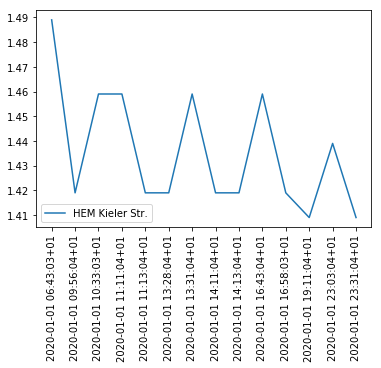

In [91]:
df=pricesproc.loc[pricesproc.station_uuid=="e1a15081-2617-9107-e040-0b0a3dfe563c"]
df1= df.sort_values('date', ascending=True)
plt.plot(df['date'], df['e5'],label=df['station_name'].values[0]+" "+df['station_address'].values[0])
plt.xticks(rotation='vertical')
plt.legend(loc="lower left")

In [69]:
len(df)

19